In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


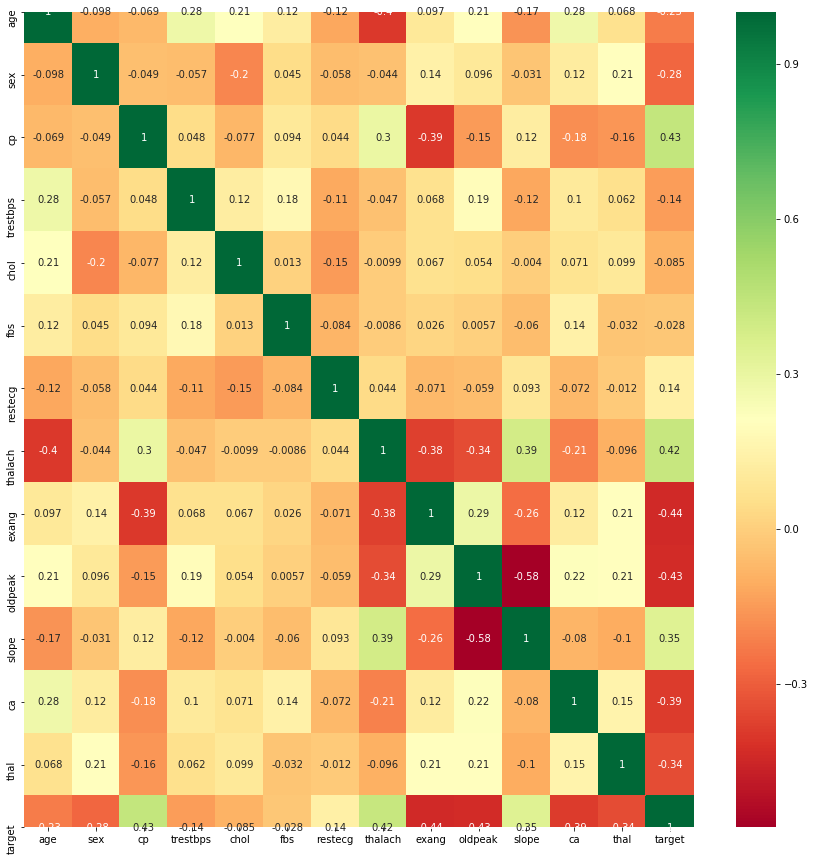

In [0]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
g=sn.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

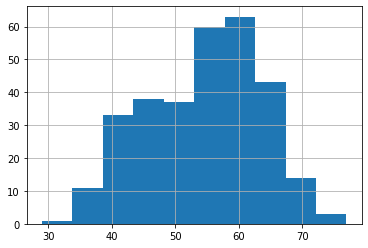

In [0]:
df['age'].hist()

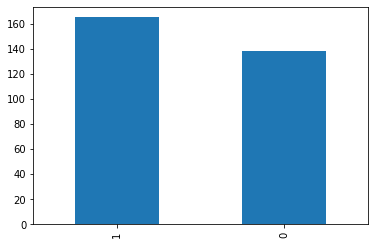

In [0]:
df['target'].value_counts().plot(kind='bar')

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
dataset=pd.get_dummies(df,columns=['sex','restecg','exang','thal'],drop_first=True)
dataset.head()

,age,cp,trestbps,chol,fbs,thalach,oldpeak,slope,ca,target,sex_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3
0,63,3,145,233,1,150,2.3,0,0,1,1,0,0,0,1,0,0
1,37,2,130,250,0,187,3.5,0,0,1,1,1,0,0,0,1,0
2,41,1,130,204,0,172,1.4,2,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0.8,2,0,1,1,1,0,0,0,1,0
4,57,0,120,354,0,163,0.6,2,0,1,0,1,0,1,0,1,0


In [0]:
dataset.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'slope',
       'ca', 'target', 'sex_1', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [0]:
X=dataset.drop(['target'],axis=1)
X.head()

,age,cp,trestbps,chol,fbs,thalach,oldpeak,slope,ca,sex_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3
0,63,3,145,233,1,150,2.3,0,0,1,0,0,0,1,0,0
1,37,2,130,250,0,187,3.5,0,0,1,1,0,0,0,1,0
2,41,1,130,204,0,172,1.4,2,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0.8,2,0,1,1,0,0,0,1,0
4,57,0,120,354,0,163,0.6,2,0,0,1,0,1,0,1,0


In [0]:
X.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'slope',
       'ca', 'sex_1', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [0]:
y=dataset['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=32)
type(X_train)

pandas.core.frame.DataFrame

In [0]:
X_train.head()

,age,cp,trestbps,chol,fbs,thalach,oldpeak,slope,ca,sex_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3
224,54,0,110,239,0,126,2.8,1,1,1,1,0,1,0,0,1
33,54,2,125,273,0,152,0.5,0,1,1,0,0,0,0,1,0
113,43,0,110,211,0,161,0.0,2,0,1,1,0,0,0,0,1
46,44,2,140,235,0,180,0.0,2,0,1,0,0,0,0,1,0
177,64,2,140,335,0,158,0.0,2,0,1,1,0,0,0,1,0


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sc.fit(X_train[columns_to_scale])
X_train[columns_to_scale]=sc.transform(X_train[columns_to_scale])
X_test[columns_to_scale]=sc.transform(X_test[columns_to_scale])


c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [0]:
X_train.head()

,age,cp,trestbps,chol,fbs,thalach,oldpeak,slope,ca,sex_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3
224,-0.013475,0,-1.206039,-0.132831,0,-1.065594,1.614949,1,1,1,1,0,1,0,0,1
33,-0.013475,2,-0.342953,0.505122,0,0.093053,-0.444062,0,1,1,0,0,0,0,1,0
113,-1.173736,0,-1.206039,-0.658204,0,0.494123,-0.891673,2,0,1,1,0,0,0,0,1
46,-1.068257,2,0.520133,-0.207884,0,1.340827,-0.891673,2,0,1,0,0,0,0,1,0
177,1.041307,2,0.520133,1.668448,0,0.360433,-0.891673,2,0,1,1,0,0,0,1,0


In [0]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
#model1.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(model1,X_train,y_train,cv=10)

scores1.mean()

0.8323945981554678

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(5)
scores2=cross_val_score(model2,X_train,y_train,cv=10)

scores2.mean()

0.809667325428195

In [0]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(12)
scores3=cross_val_score(model3,X_train,y_train,cv=10)

scores3.mean()

0.7973978919631093

In [0]:
from sklearn.model_selection import GridSearchCV
param=[{'C':[0.01,0.1,1,10,100],'kernel':['linear']},
           {'C':[0.01,0.1,1,10,100],'kernel':['rbf'],'gamma':[0.1,0.5,1,1.5] } ]
gs=GridSearchCV(estimator=model1,param_grid=param,cv=10,n_jobs=-1,return_train_score=True)
gs.fit(X_train,y_train)

c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.1, 0.5, 1, 1.5], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
best_score=gs.best_score_
best_score

0.8370044052863436

In [0]:
gs.best_params_

{'C': 10, 'kernel': 'linear'}

In [0]:
model=SVC(C= 0.1, kernel= 'linear')
model.fit(X_train,y_train)
scores=cross_val_score(model,X_train,y_train,cv=10)
print('scores: ',scores)
print('mean score: ',scores.mean())
print('variance: ',scores.var())

scores:  [0.95833333 0.69565217 0.86956522 0.86956522 0.86956522 0.69565217
 0.90909091 0.90909091 0.81818182 0.72727273]
mean score:  0.8321969696969698
variance:  0.008041937950132012


In [0]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.8289473684210527

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[27, 10],
       [ 3, 36]], dtype=int64)

Text(33.0, 0.5, 'Truth')

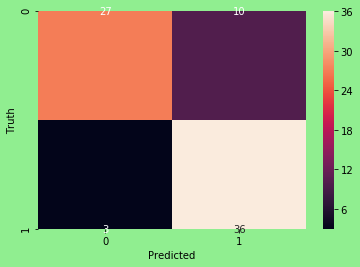

In [0]:
plt.figure(facecolor='lightgreen')
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
from sklearn.model_selection import cross_validate
scores=cross_validate(model,X_train,y_train,cv=10,n_jobs=-1,return_train_score=True)
scores

{'fit_time': array([0.00899482, 0.00499868, 0.01400113, 0.01000214, 0.01499009,
        0.0079999 , 0.00800037, 0.00799799, 0.00699663, 0.00499725]),
 'score_time': array([0.00299954, 0.00399828, 0.00299668, 0.00399899, 0.00300431,
        0.00300026, 0.00299788, 0.00299883, 0.00300074, 0.00099945]),
 'test_score': array([0.95833333, 0.69565217, 0.86956522, 0.86956522, 0.86956522,
        0.69565217, 0.90909091, 0.90909091, 0.81818182, 0.72727273]),
 'train_score': array([0.83743842, 0.85784314, 0.84803922, 0.85294118, 0.84803922,
        0.85784314, 0.85365854, 0.83902439, 0.83902439, 0.86341463])}

## ROC CURVE WITH LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(C=0.1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(lr.score(X_train,y_train))
lr.score(X_test,y_test)


0.8546255506607929


c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.868421052631579

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[29,  8],
       [ 2, 37]], dtype=int64)

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
prob=lr.predict_proba(X_test)
y_prob=prob[:,1]
y_prob

array([0.51030544, 0.0910953 , 0.78324535, 0.83502459, 0.8811191 ,
       0.77645679, 0.34817654, 0.12785941, 0.92235817, 0.93950776,
       0.38787221, 0.73941697, 0.08320488, 0.12038607, 0.85687062,
       0.09346332, 0.40703475, 0.18106398, 0.96235467, 0.20483393,
       0.66955052, 0.72995777, 0.1480646 , 0.16498047, 0.64123247,
       0.13832649, 0.31219094, 0.45917911, 0.0469859 , 0.69170842,
       0.8385384 , 0.92482832, 0.85443965, 0.4557974 , 0.19782773,
       0.94568464, 0.7166249 , 0.91746015, 0.56224361, 0.42703129,
       0.64965705, 0.85339823, 0.85674387, 0.74182447, 0.88357851,
       0.06250765, 0.81918384, 0.67545668, 0.81747716, 0.77489067,
       0.02977179, 0.88749907, 0.07757897, 0.67534675, 0.73863719,
       0.08603789, 0.00766572, 0.78398827, 0.31142035, 0.92615859,
       0.88695017, 0.92148345, 0.54176427, 0.07204551, 0.07233544,
       0.27913584, 0.87934663, 0.87850186, 0.77982235, 0.17237351,
       0.86977577, 0.64468909, 0.49099107, 0.77667886, 0.03188

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)

In [0]:
fpr

array([0.        , 0.        , 0.        , 0.02702703, 0.02702703,
       0.05405405, 0.05405405, 0.08108108, 0.08108108, 0.10810811,
       0.10810811, 0.13513514, 0.13513514, 0.16216216, 0.16216216,
       0.21621622, 0.21621622, 0.27027027, 0.27027027, 0.54054054,
       0.54054054, 1.        ])

In [0]:
tpr

array([0.        , 0.02564103, 0.33333333, 0.33333333, 0.43589744,
       0.43589744, 0.46153846, 0.46153846, 0.69230769, 0.69230769,
       0.74358974, 0.74358974, 0.82051282, 0.82051282, 0.92307692,
       0.92307692, 0.94871795, 0.94871795, 0.97435897, 0.97435897,
       1.        , 1.        ])

In [0]:
thresholds

array([1.96235467, 0.96235467, 0.87934663, 0.87850186, 0.85674387,
       0.85443965, 0.85339823, 0.8385384 , 0.77489067, 0.74182447,
       0.73863719, 0.72995777, 0.67545668, 0.67534675, 0.64123247,
       0.54176427, 0.51030544, 0.45917911, 0.4557974 , 0.18106398,
       0.17237351, 0.00766572])

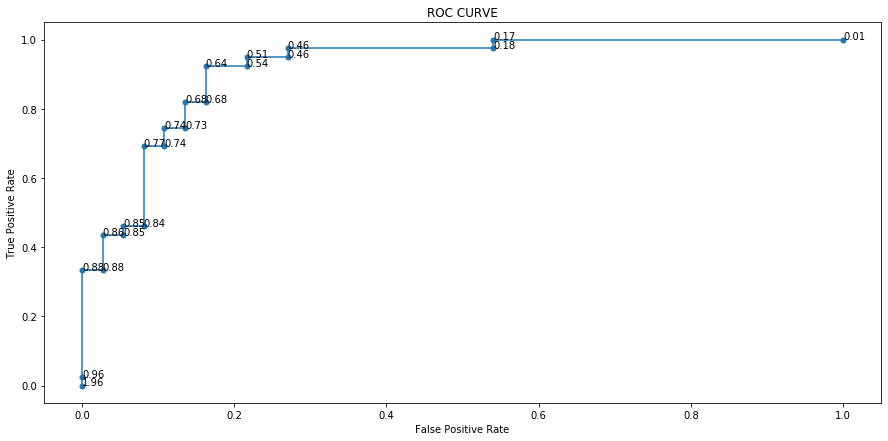

In [0]:
fig,ax=plt.subplots(figsize=(15,7))
ax.plot(fpr,tpr,marker='o',markersize=5)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for i, txt in enumerate(thresholds):
    ax.annotate("%0.2f"%(txt), (fpr[i], tpr[i]))

In [0]:
y_pred1=(y_prob>=0.45)
cm=confusion_matrix(y_test,y_pred1)
cm

array([[27, 10],
       [ 1, 38]], dtype=int64)

0.9466666666666667